In [1]:
import os, sys
sys.path.append("./beaconrunner")

import numpy as np
import pandas as pd

import plotly.express as px
import plotly.io as pio
pd.options.plotting.backend = "plotly"
pio.renderers.default = "plotly_mimetype+notebook_connected"
import plotly.graph_objects as go

from experiments.utils import display_code

import logging
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

In [2]:
import experiments.templates.reorg.observers as reorg_observers

In [3]:
from experiments.run import run
import experiments.templates.reorg.experiment as reorg_experiment

malicious_indices {2, 4, 5, 6, 8, 11, 15, 17, 18}


In [4]:
# Experiment execution
df, exceptions = run(reorg_experiment.experiment)

2021-10-22 11:30:01,157 - root - INFO - Running experiment
19 proposing block for slot 1
6 (malicious) proposing block for slot 2
8 (malicious) attesting for malicious block
15 (malicious) attesting for malicious block
7 proposing block for slot 3
2 (malicious) attesting for malicious block
4 (malicious) attesting for malicious block
18 (malicious) attesting for malicious block
resetting attack
14 proposing block for slot 4
9 proposing block for slot 5
10 proposing block for slot 6
0 proposing block for slot 7
0 proposing block for slot 8
18 (malicious) proposing block for slot 9
timestep 100 of run 1
2 (malicious) attesting for malicious block
8 (malicious) attesting for malicious block
11 (malicious) attesting for malicious block
17 (malicious) attesting for malicious block
7 proposing block for slot 10
resetting attack
16 proposing block for slot 11
8 (malicious) proposing block for slot 12
5 (malicious) attesting for malicious block
11 (malicious) attesting for malicious block
0 pr

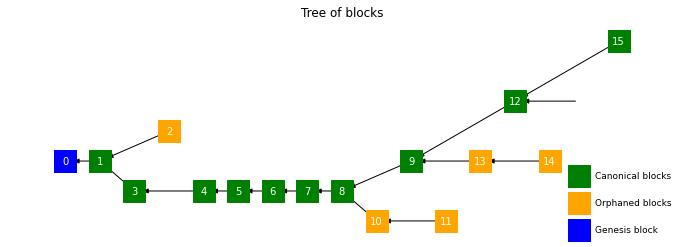

In [6]:
import matplotlib.pyplot as plt 
from experiments.visualizations.plot_chain import plot_chain_tree

ax = plot_chain_tree(df.iloc[12*16-1]["network"])
plt.show()

In [ ]:
import itertools
import pandas as pd
pd.set_option('display.max_rows', 100)
validator_df = pd.DataFrame(
    itertools.chain(*df[((df.substep == 0) | (df.substep == 4)) & (df.timestep % 12 == 1) & (df.current_slot > 11)]["current_validator_state"].iloc[:])
)
validator_df["previous_balance"] = validator_df.groupby(["validator_index"])[["balance"]].shift()
validator_df["balance_diff"] = validator_df["balance"] - validator_df["previous_balance"]
validator_df = validator_df[validator_df.slot > 12]
validator_df

In [ ]:
# validator_df.to_csv('export.csv')